[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mahes\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


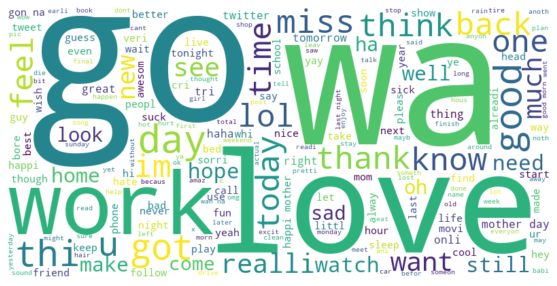

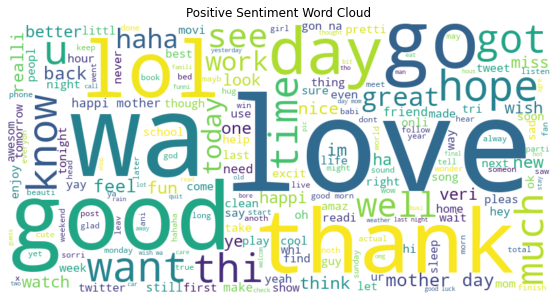

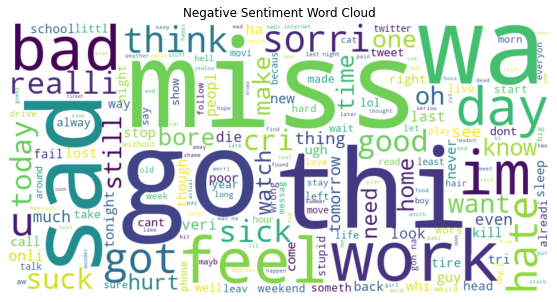

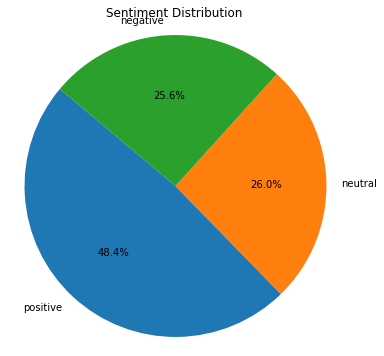

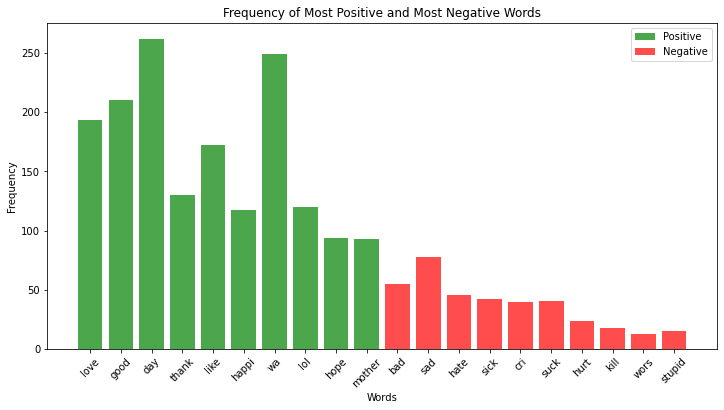

In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
data = pd.read_csv('C:\\Users\\mahes\\Downloads\\test.csv')


# Data cleaning and preprocessing, if necessary
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data['text'] = data['text'].str.lower()
# Sentiment Analysis using VADER
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

data['sentiment_scores'] = data['text'].apply(lambda x: sid.polarity_scores(x))
data['compound_sentiment'] = data['sentiment_scores'].apply(lambda x: x['compound'])
# Tokenization: Tokenize the 'text' column and store the tokens in a new column 'tokens'
data['tokens'] = data['text'].apply(word_tokenize)
tokenized_words = [word for word in data['tokens']]
# Stemming: Apply stemming to the 'tokens' column and store the stemmed tokens in a new column 'stemmed_tokens'
stemmer = PorterStemmer()
data['stemmed_tokens'] = data['tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

import nltk
nltk.download('stopwords')
# Remove Punctuation and Stopwords
stop_words = set(stopwords.words('english'))  # Set of English stopwords
data['cleaned_tokens'] = data['stemmed_tokens'].apply(
    lambda tokens: [word for word in tokens if word not in stop_words and word.isalpha()]
)
# Generate a Word Cloud based on the cleaned tokens
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(
    ' '.join(data['cleaned_tokens'].apply(lambda tokens: ' '.join(tokens)))
)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Filter data for positive sentiment
positive_data = data[data['compound_sentiment'] > 0]

# Filter data for negative sentiment
negative_data = data[data['compound_sentiment'] < 0]

# Generate word clouds for positive sentiment
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(
    ' '.join(positive_data['cleaned_tokens'].apply(lambda tokens: ' '.join(tokens)))
)

# Generate word clouds for negative sentiment
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(
    ' '.join(negative_data['cleaned_tokens'].apply(lambda tokens: ' '.join(tokens)))
)

# Display positive sentiment word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')
plt.show()

# Display negative sentiment word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show()
# Categorize sentiment into positive, negative, and neutral based on the compound sentiment score
def categorize_sentiment(compound_score):
    if compound_score > 0:
        return 'positive'
    elif compound_score < 0:
        return 'negative'
    else:
        return 'neutral'

data['sentiment_category'] = data['compound_sentiment'].apply(categorize_sentiment)

# Count the number of each sentiment category
sentiment_counts = data['sentiment_category'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()
# Tokenized words for sentiment analysis
tokenized_words = [word for token_list in data['cleaned_tokens'] for word in token_list]

# Calculate sentiment scores for each word and store in a dictionary
word_sentiment_scores = {}

for word in tokenized_words:
    word_sentiment_scores[word] = 0  # Initialize the score for each word

# Accumulate sentiment scores for each word
for idx, row in data.iterrows():
    sentiment_scores = row['sentiment_scores']
    
    for word in row['cleaned_tokens']:
        word_sentiment_scores[word] += sentiment_scores['compound']

# Get the most positive and most negative words
most_positive_words = [word for word, score in sorted(word_sentiment_scores.items(), key=lambda x: x[1], reverse=True)[:10]]
most_negative_words = [word for word, score in sorted(word_sentiment_scores.items(), key=lambda x: x[1])[:10]]

# Count the frequency of these words in the dataset
positive_word_counts = Counter(tokenized_words)
negative_word_counts = Counter(tokenized_words)

# Create a dictionary with positive and negative word frequencies
positive_word_frequencies = {word: positive_word_counts[word] for word in most_positive_words}
negative_word_frequencies = {word: negative_word_counts[word] for word in most_negative_words}

# Create a bar chart with positive words in green and negative words in red
plt.figure(figsize=(12, 6))
plt.bar(positive_word_frequencies.keys(), positive_word_frequencies.values(), color='green', label='Positive', alpha=0.7)
plt.bar(negative_word_frequencies.keys(), negative_word_frequencies.values(), color='red', label='Negative', alpha=0.7)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of Most Positive and Most Negative Words')
plt.xticks(rotation=45)
plt.legend()
plt.show()